In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Data Cleaning

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
# Reduce unique values of PaymentMethid Columns 
df['PaymentMethod'] = df['PaymentMethod'].apply(lambda x : 'Automatic' if x in ['Bank transfer (automatic)', 'Credit card (automatic)'] else x)
df['PaymentMethod'].value_counts()

PaymentMethod
Automatic           3066
Electronic check    2365
Mailed check        1612
Name: count, dtype: int64

In [5]:
# Replace ' '  with Average Value
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : 0 if x == ' ' else x).astype(float)
mean = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : mean if x == 0 else x)
df['TotalCharges'].value_counts()

TotalCharges
2279.734304    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: count, Length: 6531, dtype: int64

## Data Visualization

In [8]:
# Define list of Continuous columns Names
continuous = ['tenure', 'MonthlyCharges', 'TotalCharges']

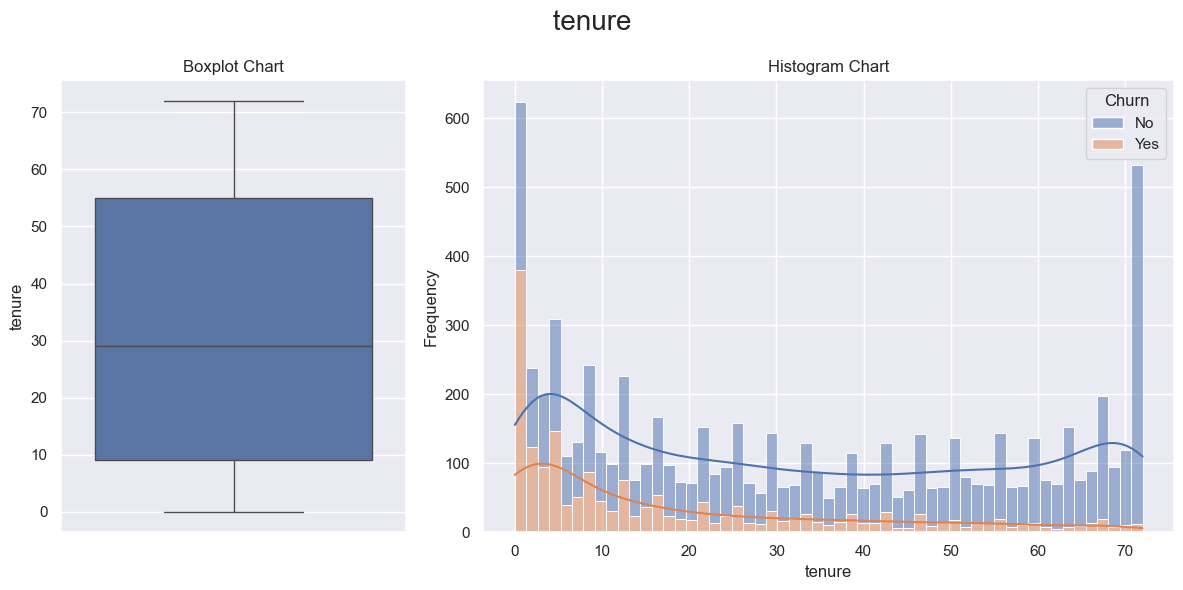

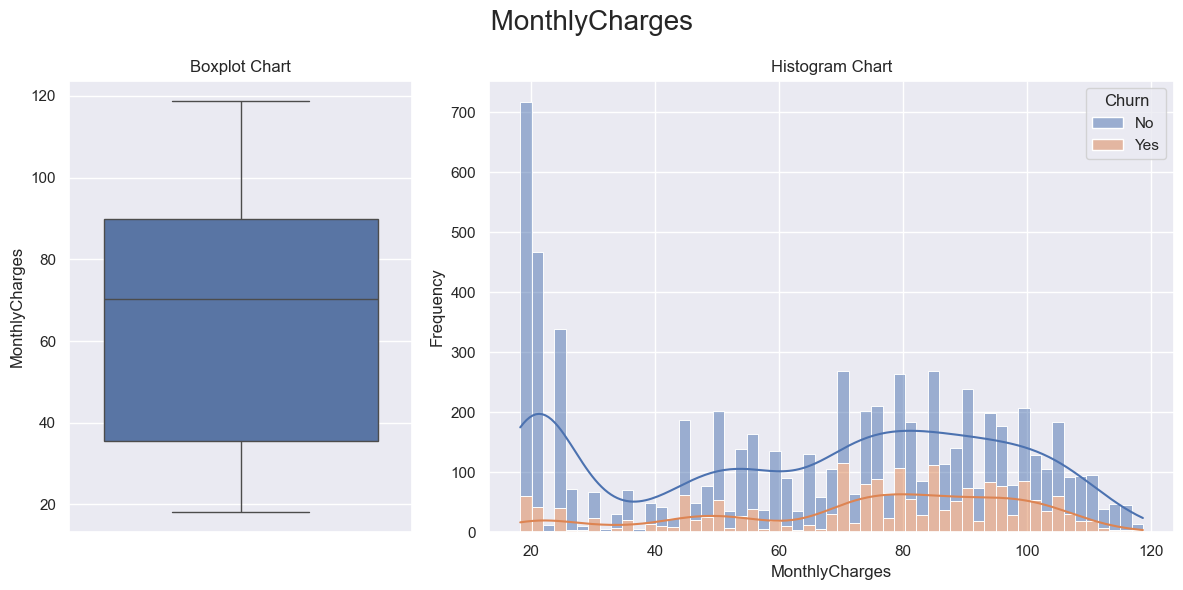

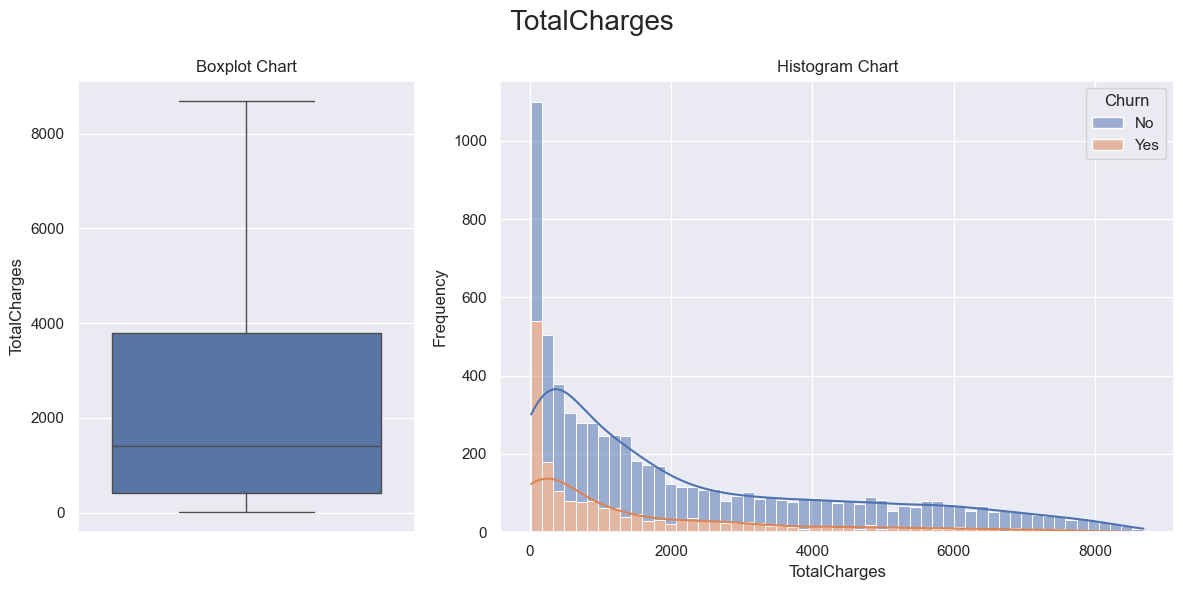

In [19]:
# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(column)

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'Churn')    

In [15]:
# Define list Name of Categorical columns 
categorical = [ 'Churn', 'SeniorCitizen', 'PaperlessBilling', 'Contract', 'PaymentMethod', 'InternetService']

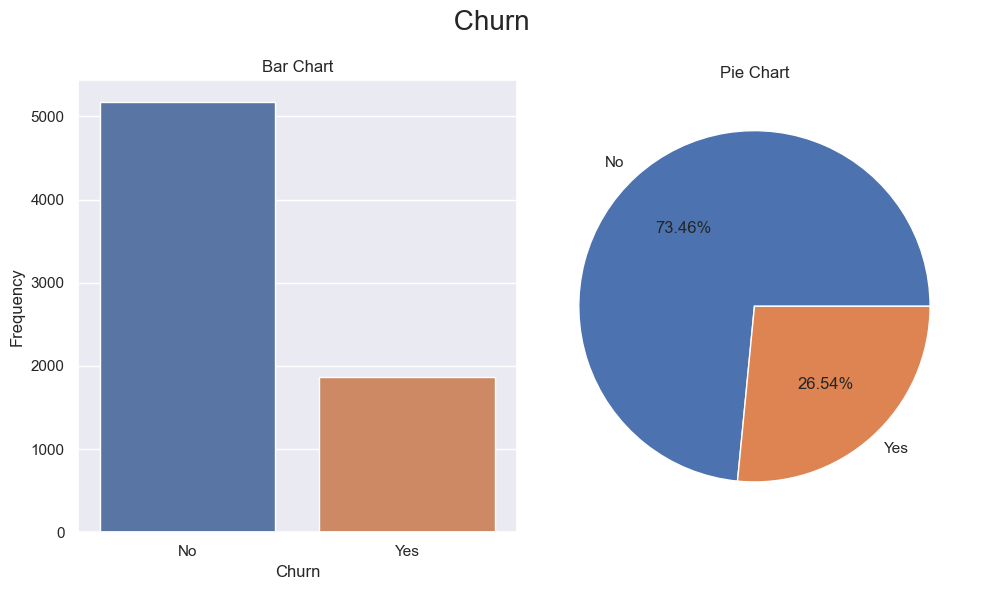

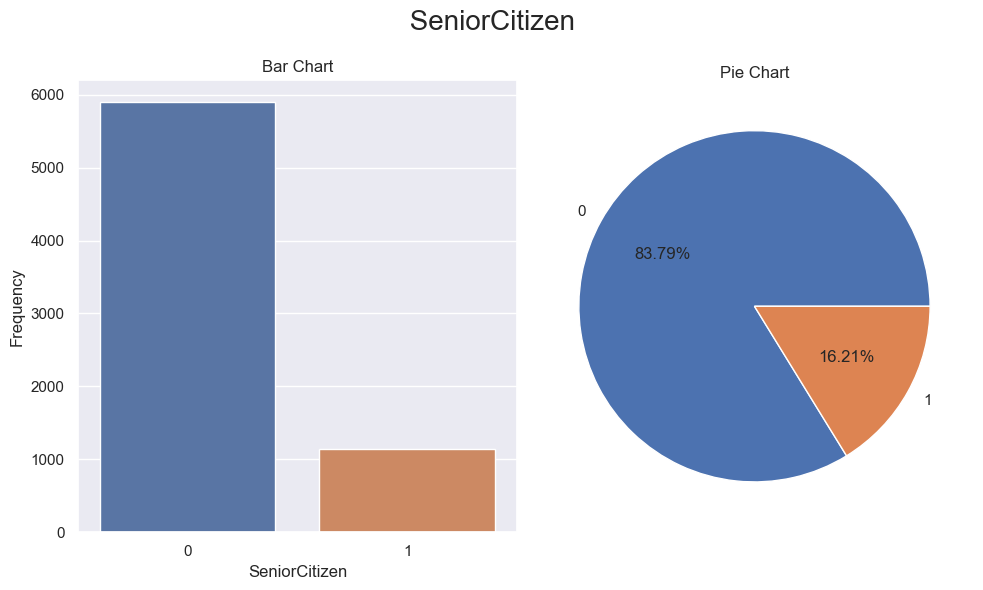

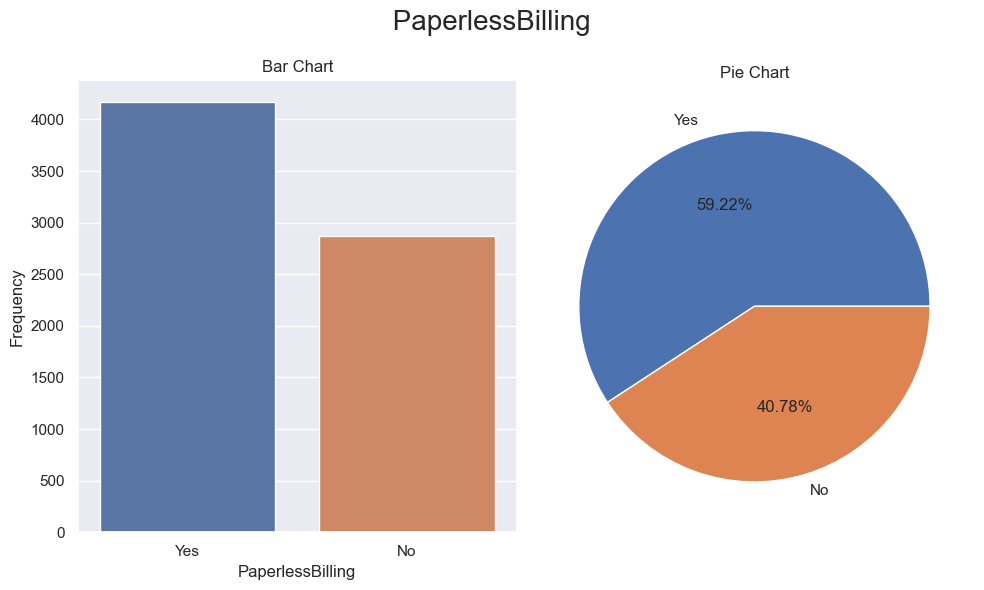

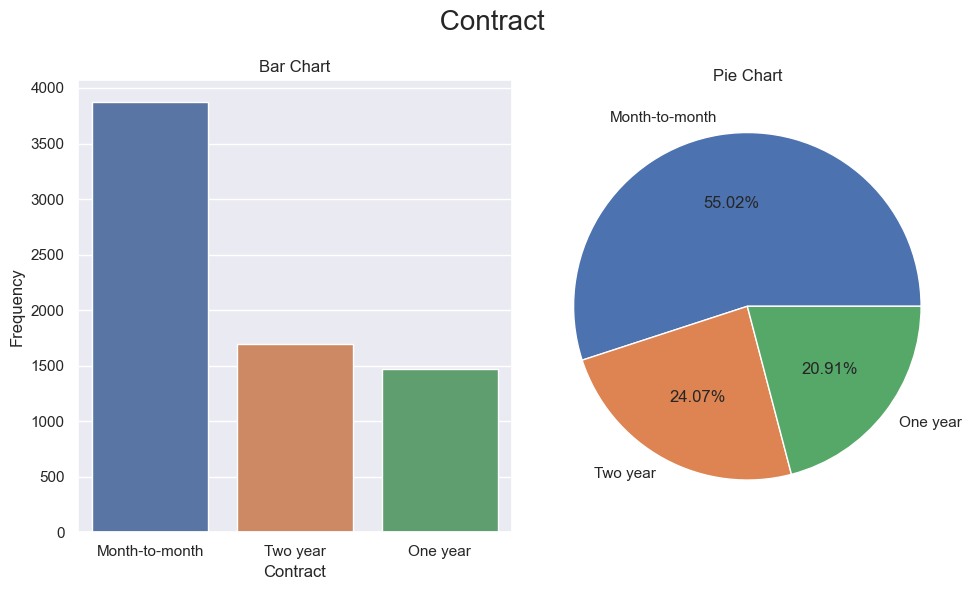

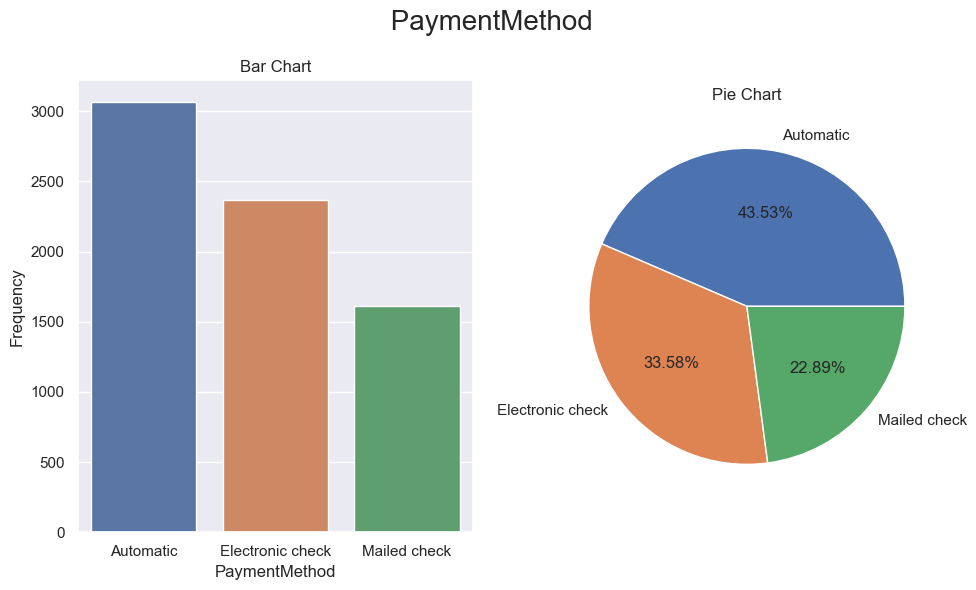

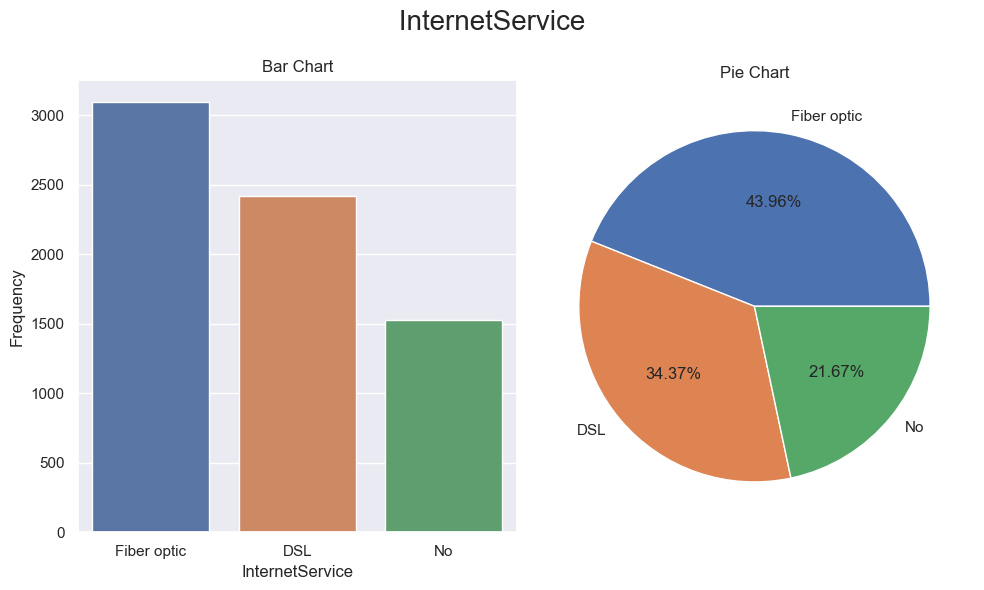

In [18]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Frequency')
    
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)
    
    plt.tight_layout()
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(df, cat)

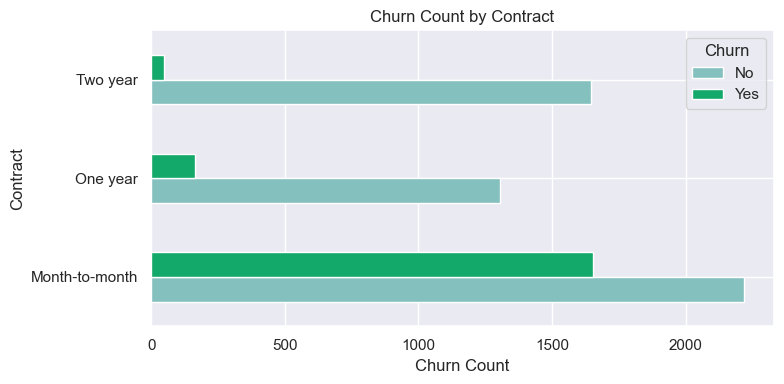

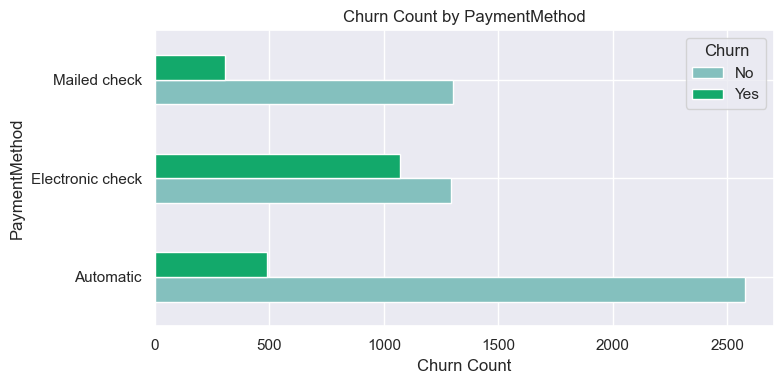

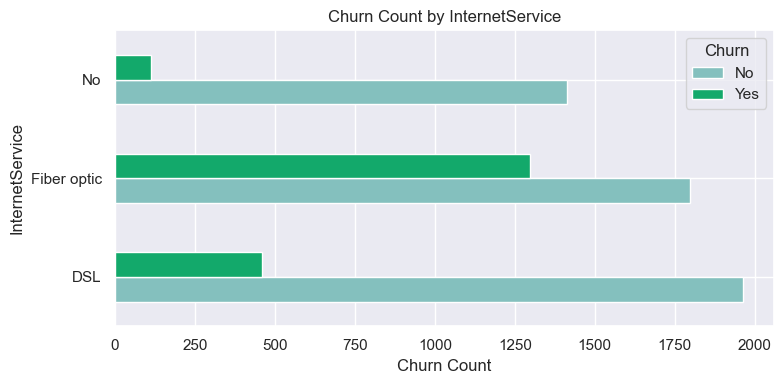

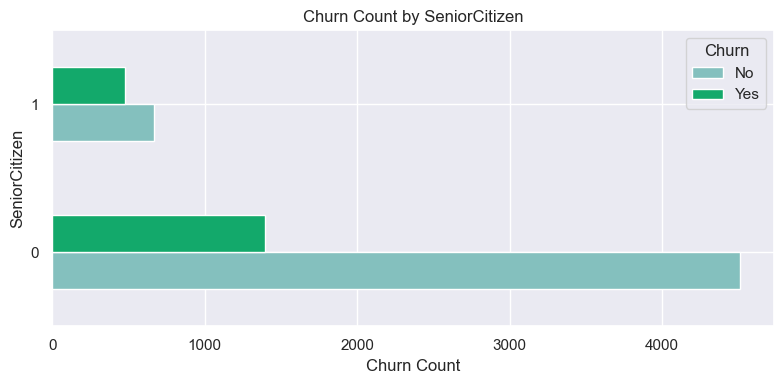

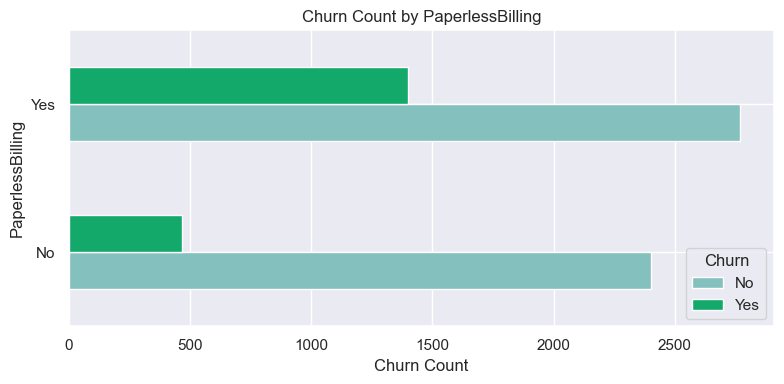

In [17]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh',  color = ['#84c0be', '#13a96b'], figsize=(8,4))
    plt.title(f'{y} Count by {x}')
    plt.xlabel(f'{y} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('Contract', 'Churn', df)
bar_plot('PaymentMethod', 'Churn', df)
bar_plot('InternetService', 'Churn', df)
bar_plot('SeniorCitizen', 'Churn', df)
bar_plot('PaperlessBilling', 'Churn', df)

## Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
le = LabelEncoder()
stc_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
le_cols = ['Churn', 'PaperlessBilling', 'PhoneService', 'Dependents', 'Partner', 'SeniorCitizen', 'gender']
dum_cols = ['PaymentMethod', 'Contract', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'InternetService', 'MultipleLines', 'PhoneService']
# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

for col in le_cols :
    df[col] = le.fit_transform(df[col])

# Apply get_dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [35]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Churn', 'customerID', 'gender'], axis=1)
y = df['Churn']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [40]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('CatBosst Classifier', CatBoostClassifier(verbose=False)),
    ('LGBM Classifier', LGBMClassifier(verbose=-1)),
    ('Random Forest', RandomForestClassifier()),
    ('XGB Classifier', XGBClassifier()),
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()


Training accuracy: Gradient Boosting 0.8262335818246361
Test accuracy: Gradient Boosting 0.8126330731014905

Training accuracy: K-Nearest Neighbors 0.8354632587859425
Test accuracy: K-Nearest Neighbors 0.7821149751596878

Training accuracy: CatBosst Classifier 0.8691870784522542
Test accuracy: CatBosst Classifier 0.8041163946061036

Training accuracy: LGBM Classifier 0.8789492367767128
Test accuracy: LGBM Classifier 0.8055358410220014

Training accuracy: Random Forest 0.9980475683351083
Test accuracy: Random Forest 0.7835344215755855

Training accuracy: XGB Classifier 0.936812211572595
Test accuracy: XGB Classifier 0.7821149751596878



In [43]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

print(f'Training accuracy:', gb.score(x_train, y_train))
print(f'Test accuracy:', accuracy_score(y_test, gb_pred))

Training accuracy: 0.8262335818246361
Test accuracy: 0.8126330731014905


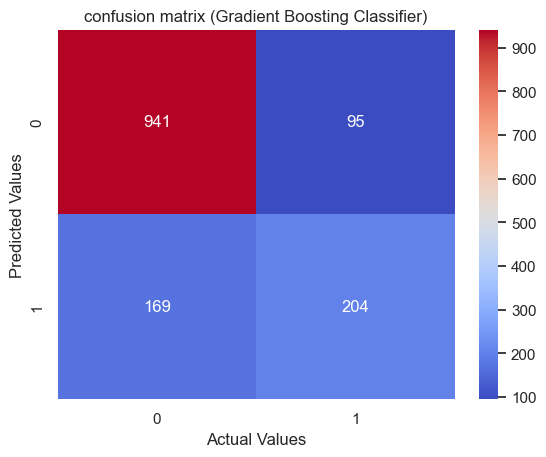

In [44]:
# Visualize confusion matrix for Gradient Boosting Classifier
sns.heatmap(confusion_matrix(y_test, gb_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Gradient Boosting Classifier)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [45]:
# Visualize Classification report for Gradient Boosting Classifier
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



### As we can see in the above cell , precision of our model in the '1' values of taget is too weak , so we gonna use of imblearn library for balancing values of target 

In [46]:
# Redefine x and y
x = df.drop(['Churn', 'customerID', 'gender'], axis=1)
y = df['Churn']  # Target Variable

In [47]:
from imblearn.over_sampling import SMOTE

# Initialize Smote
smote = SMOTE(random_state=142)

# Apply Smote to the x and y 
x_resampled, y_resampled = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [48]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('CatBosst Classifier', CatBoostClassifier(verbose=False)),
    ('LGBM Classifier', LGBMClassifier(verbose=-1)),
    ('Random Forest', RandomForestClassifier()),
    ('XGB Classifier', XGBClassifier()),
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()


Training accuracy: Gradient Boosting 0.8357091084803092
Test accuracy: Gradient Boosting 0.8217391304347826

Training accuracy: K-Nearest Neighbors 0.8765402271079971
Test accuracy: K-Nearest Neighbors 0.8101449275362319

Training accuracy: CatBosst Classifier 0.8878956269630346
Test accuracy: CatBosst Classifier 0.8526570048309179

Training accuracy: LGBM Classifier 0.8912780864943223
Test accuracy: LGBM Classifier 0.8487922705314009

Training accuracy: Random Forest 0.9979463638560039
Test accuracy: Random Forest 0.8454106280193237

Training accuracy: XGB Classifier 0.9347668518965934
Test accuracy: XGB Classifier 0.840096618357488



In [49]:
cb = CatBoostClassifier(verbose=False)
cb.fit(x_train, y_train)
cb_pred = cb.predict(x_test)

print(f'Training accuracy:', cb.score(x_train, y_train))
print(f'Test accuracy:', accuracy_score(y_test, cb_pred))

Training accuracy: 0.8878956269630346
Test accuracy: 0.8526570048309179


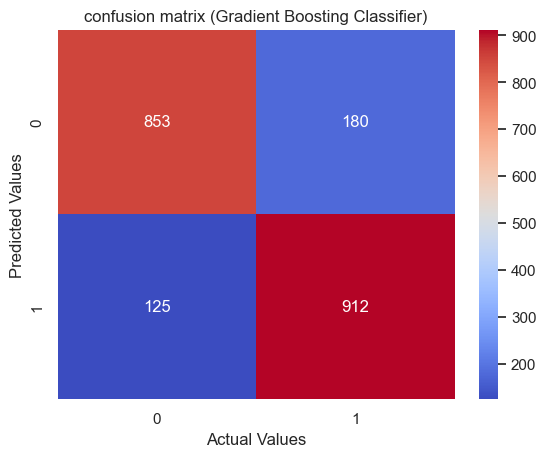

In [50]:
# Visualize confusion matrix for Gradient Boosting Classifier
sns.heatmap(confusion_matrix(y_test,cb_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Gradient Boosting Classifier)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [51]:
# Visualize Classification report for Gradient Boosting Classifier
print(classification_report(y_test,cb_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1033
           1       0.84      0.88      0.86      1037

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



By employing the SMOTE method, the number of samples for minority classes has increased, leading to an enhancement in the predictive accuracy of the model. Rebalancing the model with new and balanced data has resulted in improved performance in predicting fraudulent warranty claims.

These findings demonstrate that utilizing class balancing techniques like SMOTE can significantly enhance the performance of fraud prediction models. Therefore, it is recommended to employ ADASYN and machine learning models trained using this method for analyzing and predicting warranty claims fraud, as it can lead to improved accuracy and predictive capability of the models.

### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com